In [1]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA


In [2]:
n_samples = 20
seed = np.random.RandomState(seed=3)

In [3]:
seed

RandomState(MT19937) at 0x10BEA8490

In [4]:
X_true = seed.randint(0, 20, 2 * n_samples).astype(np.float)

In [5]:
X_true.shape

(40,)

In [6]:
X_true

array([10.,  3.,  8.,  0., 19., 10., 11.,  9., 10.,  6.,  0., 12.,  7.,
       14., 17.,  2.,  2.,  1., 19.,  5.,  8., 14.,  1., 10.,  7., 11.,
        1., 15., 16.,  5., 17., 14.,  0.,  0.,  9., 18.,  5.,  7.,  5.,
       14.])

In [7]:
X_true = X_true.reshape((n_samples, 2))

In [8]:
X_true.shape
X_true

array([[10.,  3.],
       [ 8.,  0.],
       [19., 10.],
       [11.,  9.],
       [10.,  6.],
       [ 0., 12.],
       [ 7., 14.],
       [17.,  2.],
       [ 2.,  1.],
       [19.,  5.],
       [ 8., 14.],
       [ 1., 10.],
       [ 7., 11.],
       [ 1., 15.],
       [16.,  5.],
       [17., 14.],
       [ 0.,  0.],
       [ 9., 18.],
       [ 5.,  7.],
       [ 5., 14.]])

In [9]:
X_true.shape

(20, 2)

In [12]:
import pandas as pd
sample_df = pd.DataFrame(X_true,columns=['x'+str(i) for i in range(1,3)])
sample_df.head()


,x1,x2
0,10.0,3.0
1,8.0,0.0
2,19.0,10.0
3,11.0,9.0
4,10.0,6.0


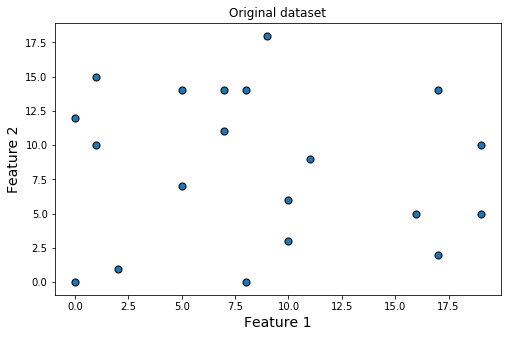

In [28]:

plt.figure(figsize=(8,5))    
plt.scatter(sample_df['x1'],sample_df['x2'],s=50, edgecolors='black')

plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.title("Original dataset")
plt.show()

In [29]:
#need to center the data 
X_true -= X_true.mean()

In [33]:
center_df = pd.DataFrame(X_true,columns=['x_c'+str(i) for i in range(1,3)])
center_df.head()


,x_c1,x_c2
0,1.45,-5.55
1,-0.55,-8.55
2,10.45,1.45
3,2.45,0.45
4,1.45,-2.55


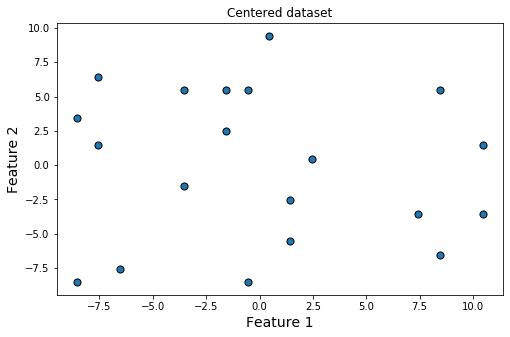

In [34]:
plt.figure(figsize=(8,5))    
plt.scatter(center_df['x_c1'],center_df['x_c2'],s=50, edgecolors='black')

plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.title("Centered dataset")
plt.show()

In [35]:
#We can see that the data is now centered at the origin.

In [39]:
#generate the similarity matrix for this dataset
similarities = euclidean_distances(X_true)

In [40]:
similarities.shape

(20, 20)

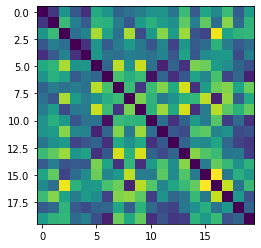

In [41]:
plt.imshow(similarities)

In [61]:
#adding high dimensional noise to the similarity
noise = np.random.rand(n_samples, n_samples)
noise = noise + noise.T
noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0
similarities += noise

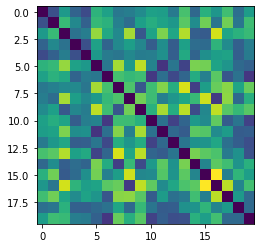

In [62]:
plt.imshow(similarities)

In [63]:
print(similarities.shape)

(20, 20)


In [88]:
nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", random_state=False, n_jobs=1,
                    n_init=1)
npos = nmds.fit_transform(similarities, init=pos)

#Rescale the data
pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())
#npos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((npos ** 2).sum())


In [89]:
clf = PCA(n_components=2)

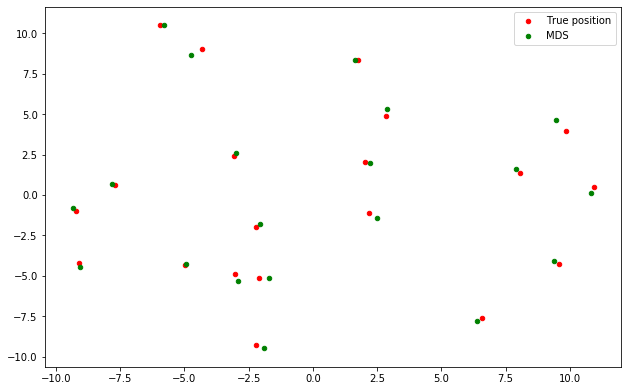

In [93]:
X_true = clf.fit_transform(X_true)

pos = clf.fit_transform(pos)

#npos = clf.fit_transform(npos)

fig = plt.figure(figsize=(8,5))
ax = plt.axes([0., 0., 1., 1.])

plt.scatter(X_true[:, 0], X_true[:, 1], c='r', s=20)
plt.scatter(pos[:, 0], pos[:, 1], s=20, c='g')
#plt.scatter(npos[:, 0], npos[:, 1], s=20, c='b')
plt.legend(('True position','MDS'), loc='best')

plt.show()

In [151]:
no_samp = 20
seed = np.random.RandomState(seed=3)
X = seed.randint(0, 20, 4 * n_samples).astype(np.float)

In [152]:
X.shape

(80,)

In [153]:
X = X.reshape((no_samp, 4))

In [154]:
X.shape

(20, 4)

In [155]:
sample1_df = pd.DataFrame(X ,columns=['x'+str(i) for i in range(1,5)])
sample1_df.head()

,x1,x2,x3,x4
0,10.0,3.0,8.0,0.0
1,19.0,10.0,11.0,9.0
2,10.0,6.0,0.0,12.0
3,7.0,14.0,17.0,2.0
4,2.0,1.0,19.0,5.0


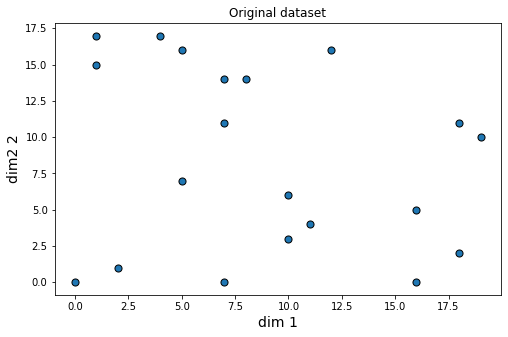

In [156]:
plt.figure(figsize=(8,5))    

plt.scatter(sample1_df['x1'],sample1_df['x2'],s=50, edgecolors='black')

plt.xlabel('dim 1',fontsize=14)
plt.ylabel('dim2 2',fontsize=14)
plt.title("Original dataset")
plt.show()

In [157]:
import plotly
import plotly.graph_objs as go

fig1 = go.Scatter3d(x=sample1_df['x1'],
                    y=sample1_df['x2'],
                    z=sample1_df['x3'],
                    marker=dict(opacity=0.9,
                                reversescale=True,
                                colorscale='Blues',
                                size=5),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="dim1"),
                                yaxis=dict( title="dim2"),
                                zaxis=dict( title="dim3")),)
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("3DPlot.html"))

'3DPlot.html'

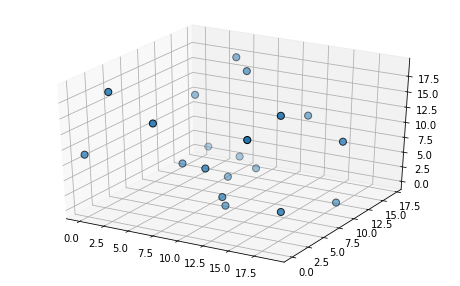

In [158]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')

x = sample1_df['x1']
y = sample1_df['x2']
z = sample1_df['x3']

ax.scatter(x, y, z, s=50, edgecolors='black')
plt.show()


In [159]:
#need to center the data 
X -= X.mean()
sim_mat = euclidean_distances(X)

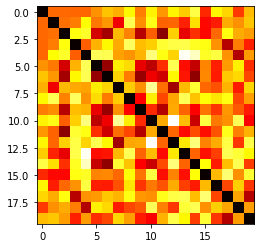

In [160]:
plt.imshow(sim_mat)

In [161]:
sim_mat.shape

(20, 20)

In [162]:
noise_dim = np.random.rand(n_samples, n_samples)
noise_dim = noise_dim + noise_dim.T
noise_dim[np.arange(noise_dim.shape[0]), np.arange(noise_dim.shape[0])] = 0
sim_mat += noise_dim

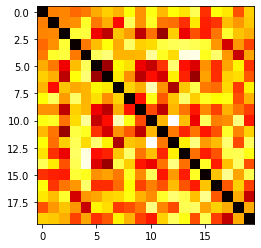

In [163]:
plt.imshow(sim_mat)

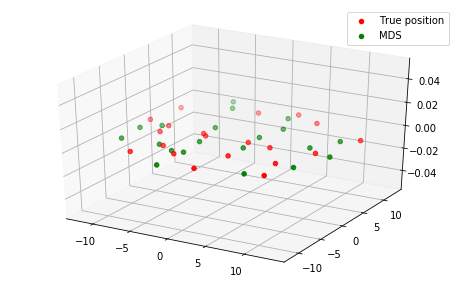

In [169]:
mds_dim = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed, dissimilarity="precomputed", n_jobs=1)
pos_dim= mds.fit(similarities).embedding_
#Rescale the data
pos_dim *= np.sqrt((X ** 2).sum()) / np.sqrt((pos_dim ** 2).sum())

clf_dim = PCA(n_components=2)
X = clf_dim.fit_transform(X)

pos_dim = clf_dim.fit_transform(pos_dim)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
x = X[:, 0]
y = X[:, 1]
#z = X[:, 2]

p_x = pos_dim[:, 0]
p_y = pos_dim[:, 1]
#p_z = pos_dim[:, 2]

ax.scatter(x, y, c='r', s=20)
ax.scatter(p_x, p_y, s=20, c='g')
plt.legend(('True position','MDS'), loc='best')

plt.show()


In [166]:
pos_dim.shape

(20, 2)

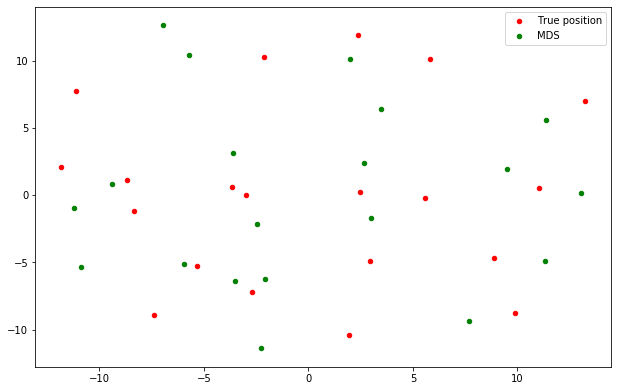

In [170]:
fig = plt.figure(figsize=(8,5))
ax = plt.axes([0., 0., 1., 1.])

plt.scatter(X[:, 0], X[:, 1], c='r', s=20)
plt.scatter(pos_dim[:, 0], pos_dim[:, 1], s=20, c='g')
plt.legend(('True position','MDS'), loc='best')

plt.show()